# 1. About Data Set

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests

The dataset was downloaded from the UCI Machine Learning Repository.

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

Two datasets were combined and few values were randomly removed.

Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
* 1 - fixed acidity
* 2 - volatile acidity
* 3 - citric acid
* 4 - residual sugar
* 5 - chlorides
* 6 - free sulfur dioxide
*7 - total sulfur dioxide
* 8 - density
* 9 - pH
* 10 - sulphates
* 11 - alcohol Output variable (based on sensory data):
* 12 - quality (score between 0 and 10)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import confusion_matrix, classification_report


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC






# 2. DATA PREPARATION, CLEANING AND EXPLORATORY DATA ANALYSIS

In [2]:
# load the dataset
linktofile='F:\\Data Science\\IBM Machine Learning Specialization\\3. Supervised Machine Learning Classification\\final project\\Wine_Quality_Data.csv'
df=pd.read_csv(linktofile)
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
6492     11.2        6  white  
6493      9.6        5  white  
6494      9.4        6  white  
6495     12.8        7  white  
6496     11.8        6  white  

[6497 rows x 13 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [5]:
df.drop('color',axis=1,inplace=True)

In [6]:
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
6492     11.2        6  
6493      9.6        5  
6494      9.4        6  
6495     12.8        7  
6496     11.8        6  

[6497 rows x 12 columns]

In [51]:
# There are total 1179 duplicates in this dataset. 
# The quality ratings for the same/similar wine were given by different wine tasters so there is a possibility of similar reviews. We can thus keep these duplicates.
df.duplicated().sum()

1179

In [44]:
# detailed overview ofthe data
import pandas_profiling as pp

report=pp.ProfileReport(df,title = "Pandas Profile Report")
report

ModuleNotFoundError: No module named 'pandas_profiling'

In [7]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

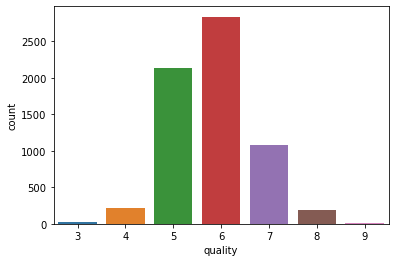

In [27]:
#count of the target variable
sns.countplot(x='quality', data=df)

Lets see how the data columns are distributed in the data set

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

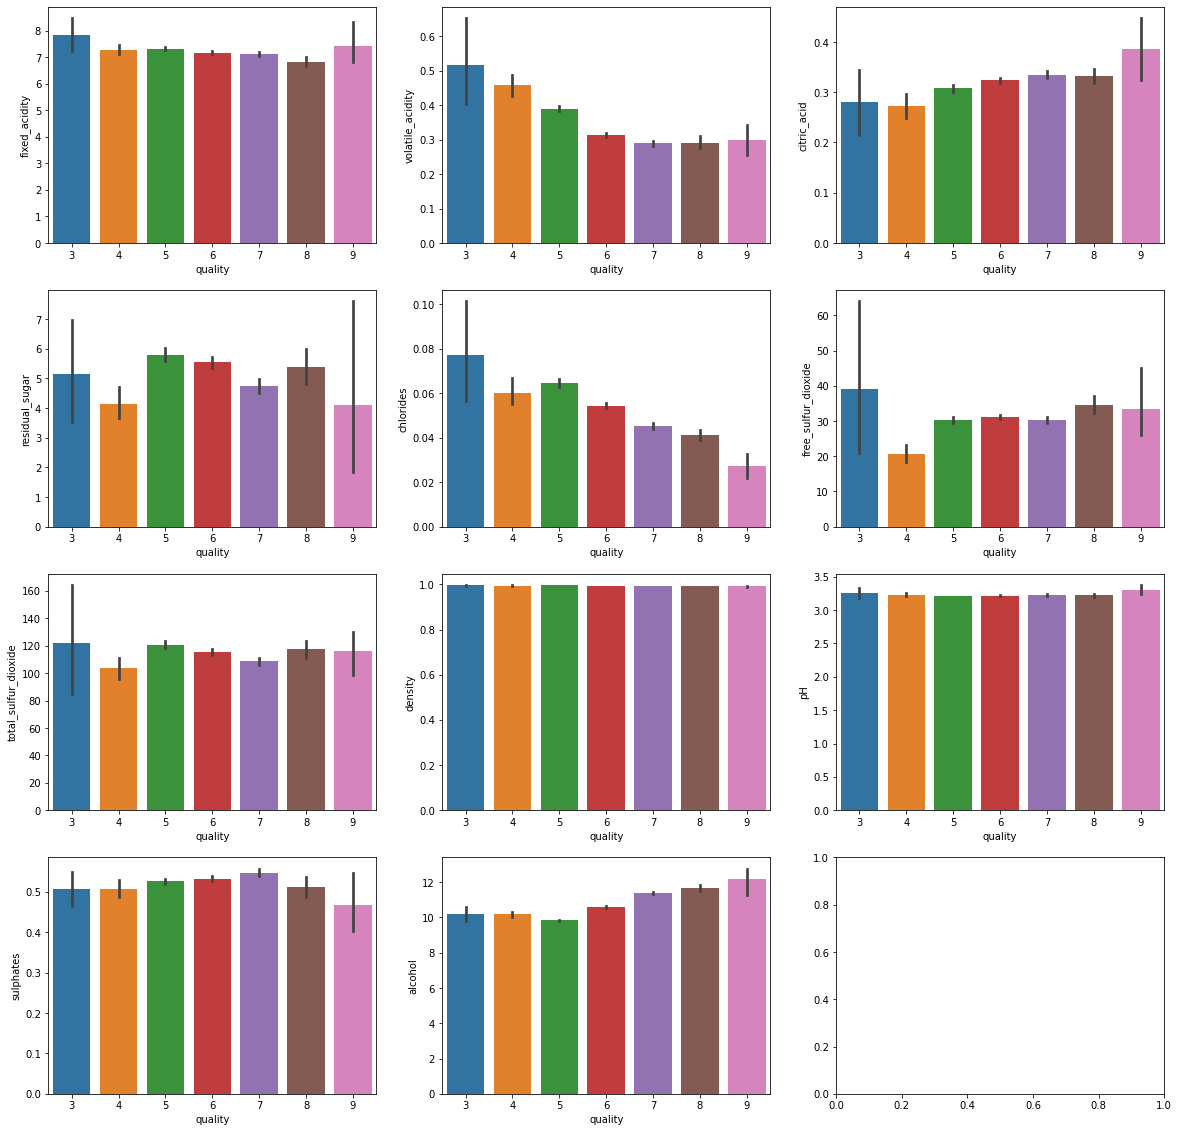

In [10]:
fig, axs = plt.subplots(4, 3,figsize=(20, 20))
sns.barplot(ax=axs[0,0],data=df,x='quality',y='fixed_acidity')
sns.barplot(ax=axs[0,1],data=df,x='quality',y='volatile_acidity')
sns.barplot(ax=axs[0,2],data=df,x='quality',y='citric_acid')
sns.barplot(ax=axs[1,0],data=df,x='quality',y='residual_sugar')
sns.barplot(ax=axs[1,1],data=df,x='quality',y='chlorides')
sns.barplot(ax=axs[1,2],data=df,x='quality',y='free_sulfur_dioxide')
sns.barplot(ax=axs[2,0],data=df,x='quality',y='total_sulfur_dioxide')
sns.barplot(ax=axs[2,1],data=df,x='quality',y='density')
sns.barplot(ax=axs[2,2],data=df,x='quality',y='pH')
sns.barplot(ax=axs[3,0],data=df,x='quality',y='sulphates')
sns.barplot(ax=axs[3,1],data=df,x='quality',y='alcohol')

* Here we see that fixed acidity,residual sugar, does not give any specification to classify the quality.
* wine quality increases as the volatile acidity and chlorides decreases
* high quality wines contains higher citric acid and alcohol
* other contents does not tell much how they change quality of wine

In [34]:
import warnings
warnings.filterwarnings('ignore')

Boxplot shows there are quite outliers for every column especially fixed_acidity,volatile-acidity,citric_acid,chlorides,sulphates

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

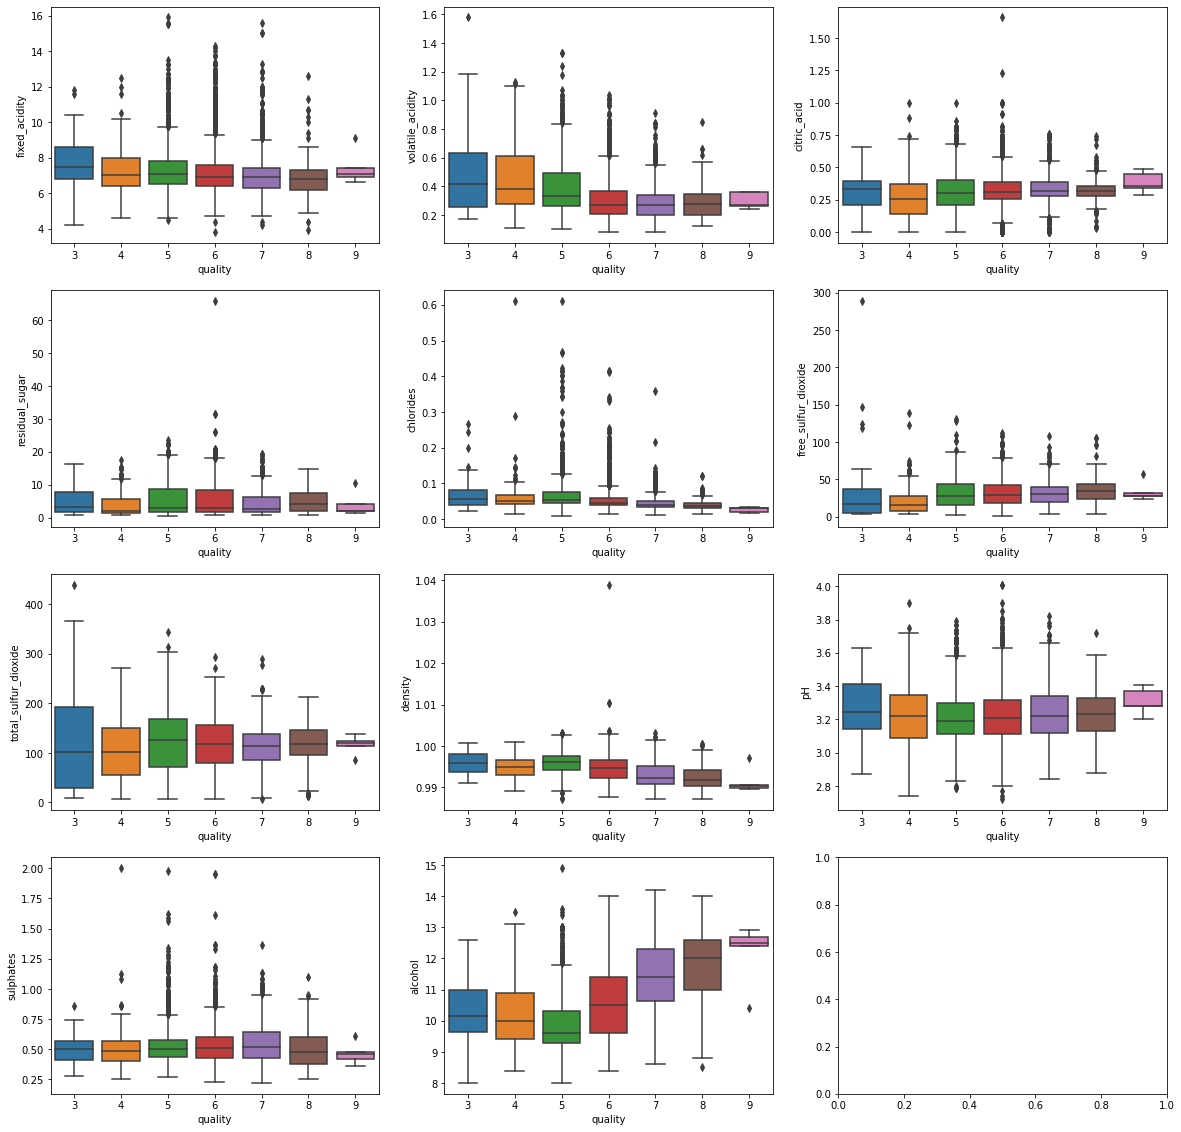

In [42]:
#Plot a boxplot to check for Outliers
fig, axs = plt.subplots(4, 3,figsize=(20, 20))
sns.boxplot(ax=axs[0,0],data=df,x='quality',y='fixed_acidity')
sns.boxplot(ax=axs[0,1],data=df,x='quality',y='volatile_acidity')
sns.boxplot(ax=axs[0,2],data=df,x='quality',y='citric_acid')
sns.boxplot(ax=axs[1,0],data=df,x='quality',y='residual_sugar')
sns.boxplot(ax=axs[1,1],data=df,x='quality',y='chlorides')
sns.boxplot(ax=axs[1,2],data=df,x='quality',y='free_sulfur_dioxide')
sns.boxplot(ax=axs[2,0],data=df,x='quality',y='total_sulfur_dioxide')
sns.boxplot(ax=axs[2,1],data=df,x='quality',y='density')
sns.boxplot(ax=axs[2,2],data=df,x='quality',y='pH')
sns.boxplot(ax=axs[3,0],data=df,x='quality',y='sulphates')
sns.boxplot(ax=axs[3,1],data=df,x='quality',y='alcohol')

In [43]:
df.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

Let's convert wine quality into bad or good quality wines.

* [2-6] - bad quality wine
* (6-10] - good quality wine

In [11]:
data=df.copy()
bins=(2,6,10)
group_names=['bad','good']
data['quality']=pd.cut(data['quality'],bins=bins,labels=group_names)
data['quality']

0        bad
1        bad
2        bad
3        bad
4        bad
        ... 
6492     bad
6493     bad
6494     bad
6495    good
6496     bad
Name: quality, Length: 6497, dtype: category
Categories (2, object): ['bad' < 'good']

Now lets assign a labels to our quality variable using LabelEncoder.

Bad becomes 0 and good becomes 1 

In [12]:
label_quality = LabelEncoder()
data['quality'] = label_quality.fit_transform(data['quality'])
data['quality']

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    1
6496    0
Name: quality, Length: 6497, dtype: int32

In [13]:
data

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        0  
4         9.4        0  
...       ...      ...  
6492     11.2        0  
6493      9.6        0  
6494      9.4        0  
6495     12.8        1  
6496     11.8        0  

[6497 rows x 12 columns]

(12.5, -0.5)

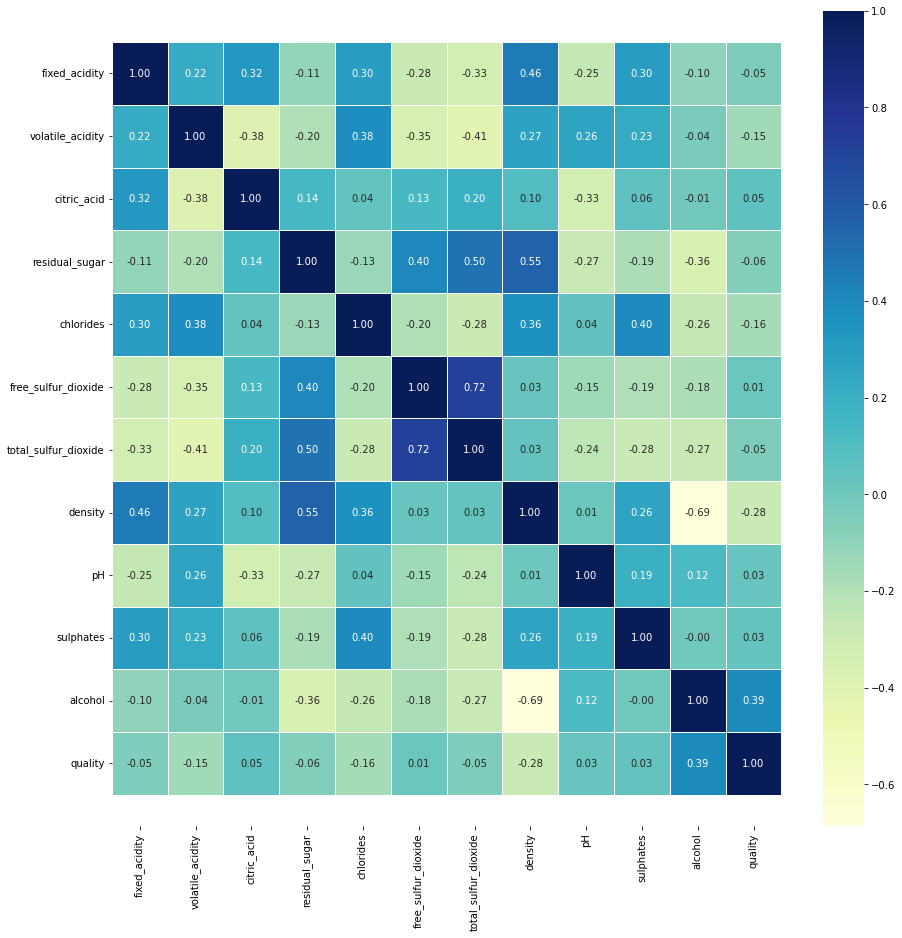

In [14]:
# Studying the correlations between features using Heat Map!
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

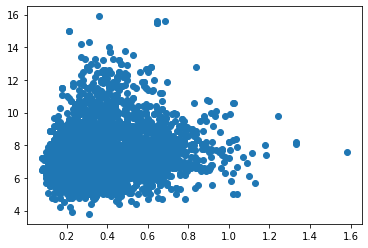

In [15]:
plt.scatter(data['volatile_acidity'],data['fixed_acidity'])

In [16]:
data.corr()

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.049447         -0.151714     0.054444   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity              -0.111981   0.298195            -0.282735   
volatile_acidity           -0.196011   0.377124            -0.352557   
citric_acid                 0.142451   0.038998             0.133126   
residual_sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free_sulfur_dioxide         0.402871  -0.195045             1.000000   
total_sulfur_dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.063992  -0.161781             0.014767   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile_acidity                 -0.414476  0.271296  0.261454   0.225984   
citric_acid                       0.195242  0.096154 -0.329808   0.056197   
residual_sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free_sulfur_dioxide               0.720934  0.025717 -0.145854  -0.188457   
total_sulfur_dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.051226 -0.275441  0.028149   0.033971   

                       alcohol   quality  
fixed_acidity        -0.095452 -0.049447  
volatile_acidity     -0.037640 -0.151714  
citric_acid          -0.010493  0.054444  
residual_sugar       -0.359415 -0.063992  
chlorides            -0.256916 -0.161781  
free_sulfur_dioxide  -0.179838  0.014767  
total_sulfur_dioxide -0.265740 -0.051226  
density              -0.686745 -0.275441  
pH                    0.121248  0.028149  
sulphates            -0.003029  0.033971  
alcohol               1.000000  0.390486  
quality               0.390486  1.000000

In [17]:
# Lets see how skewed is our data. There is skewness for most of the data. 
for i in data.iloc[:,:-1]:
    print(data[i].skew())

1.7232896467669239
1.4950965423685545
0.4717306724886708
1.4354042627889907
5.3998277319699035
1.2200660740665203
-0.0011774782344379131
0.5036017301419995
0.38683879806082694
1.7972700037785152
0.565717729098518


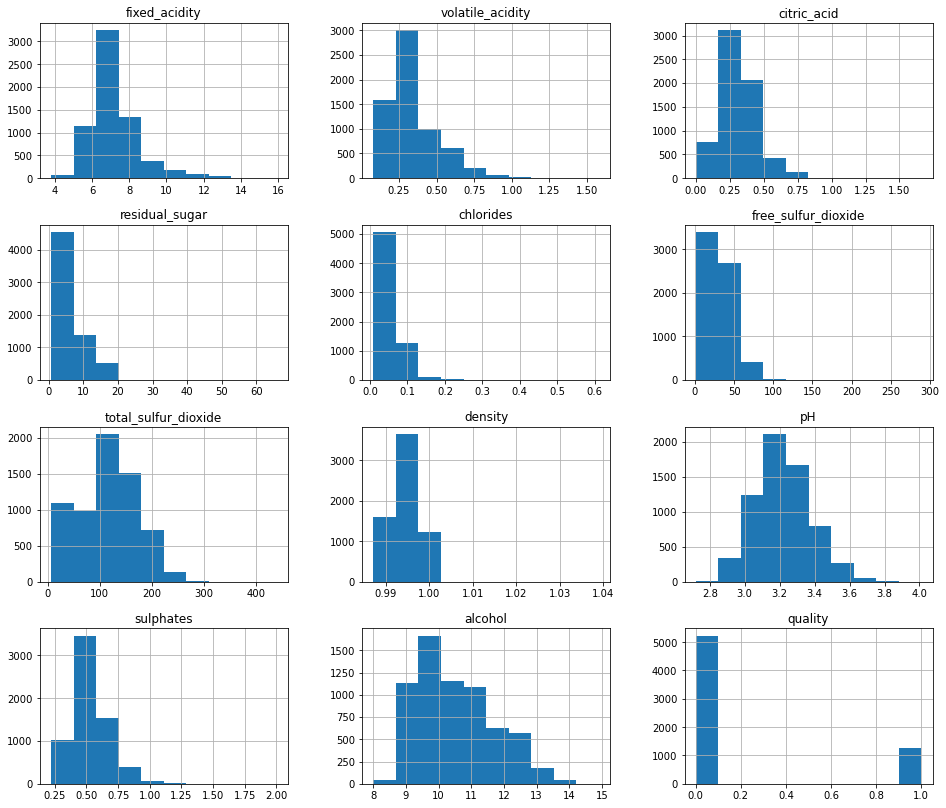

In [56]:
data.hist(bins=10,figsize=(16,14))
plt.show()

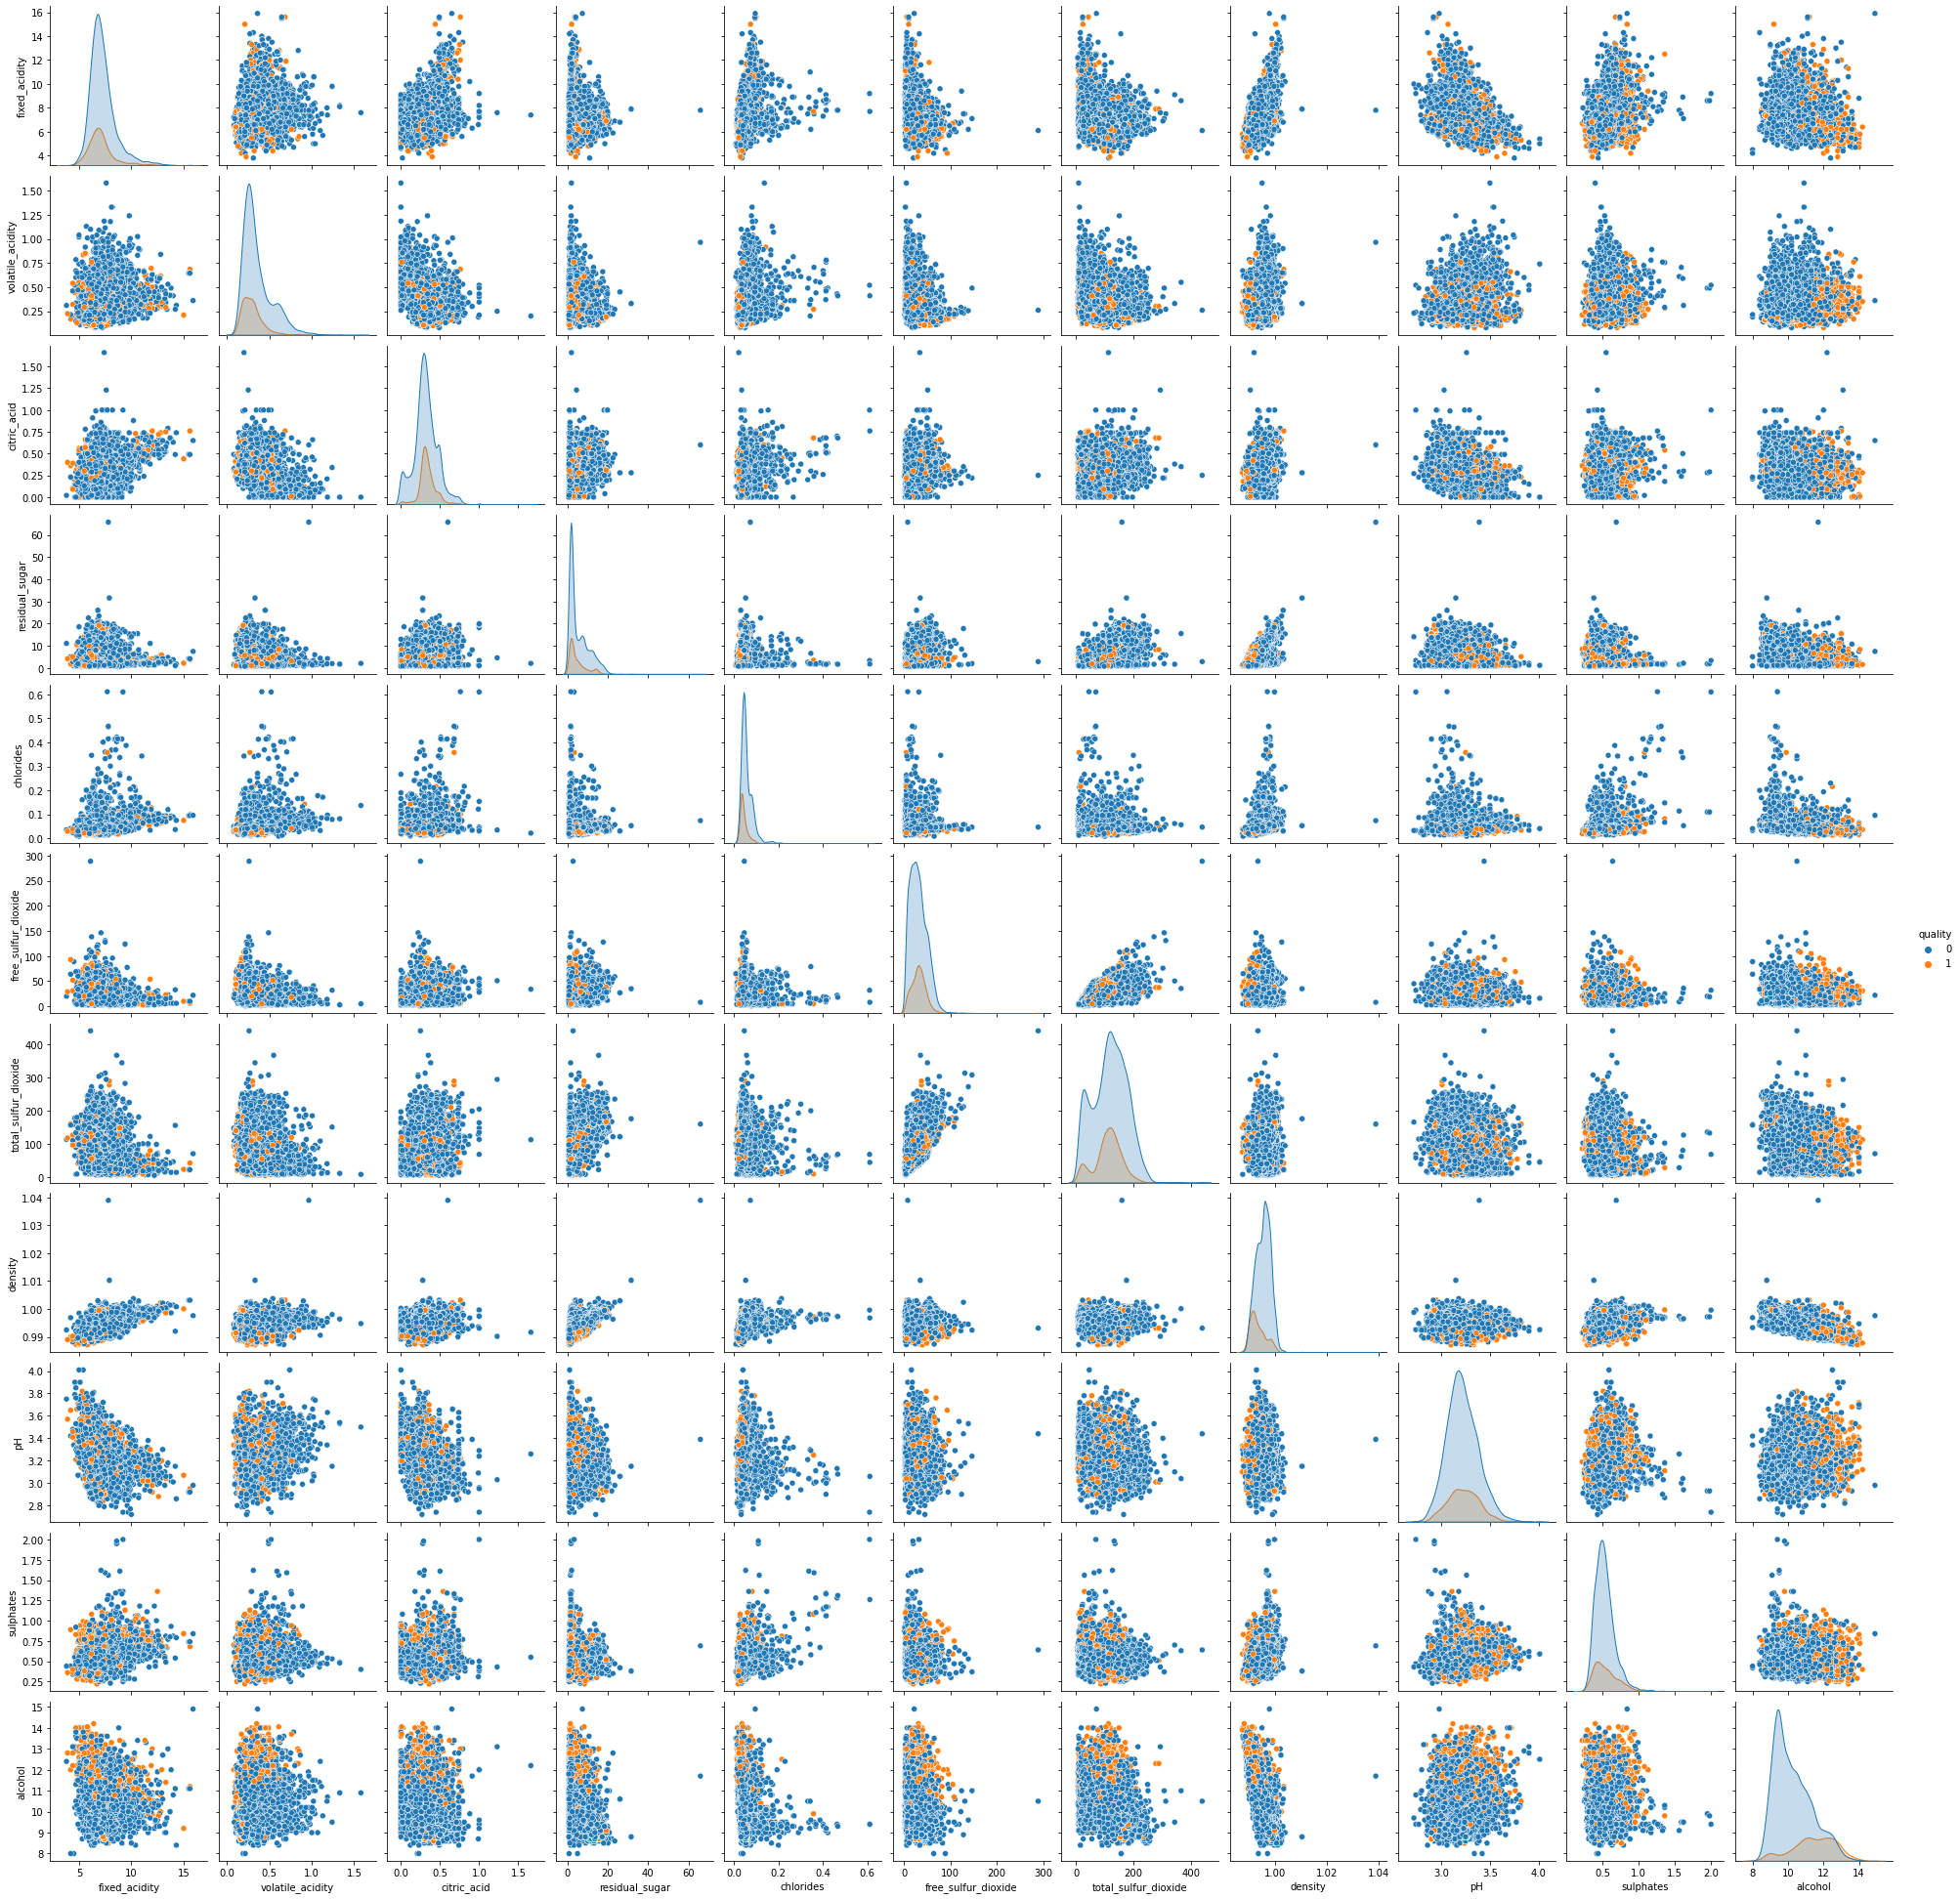

In [52]:

sns.pairplot(data, hue='quality');

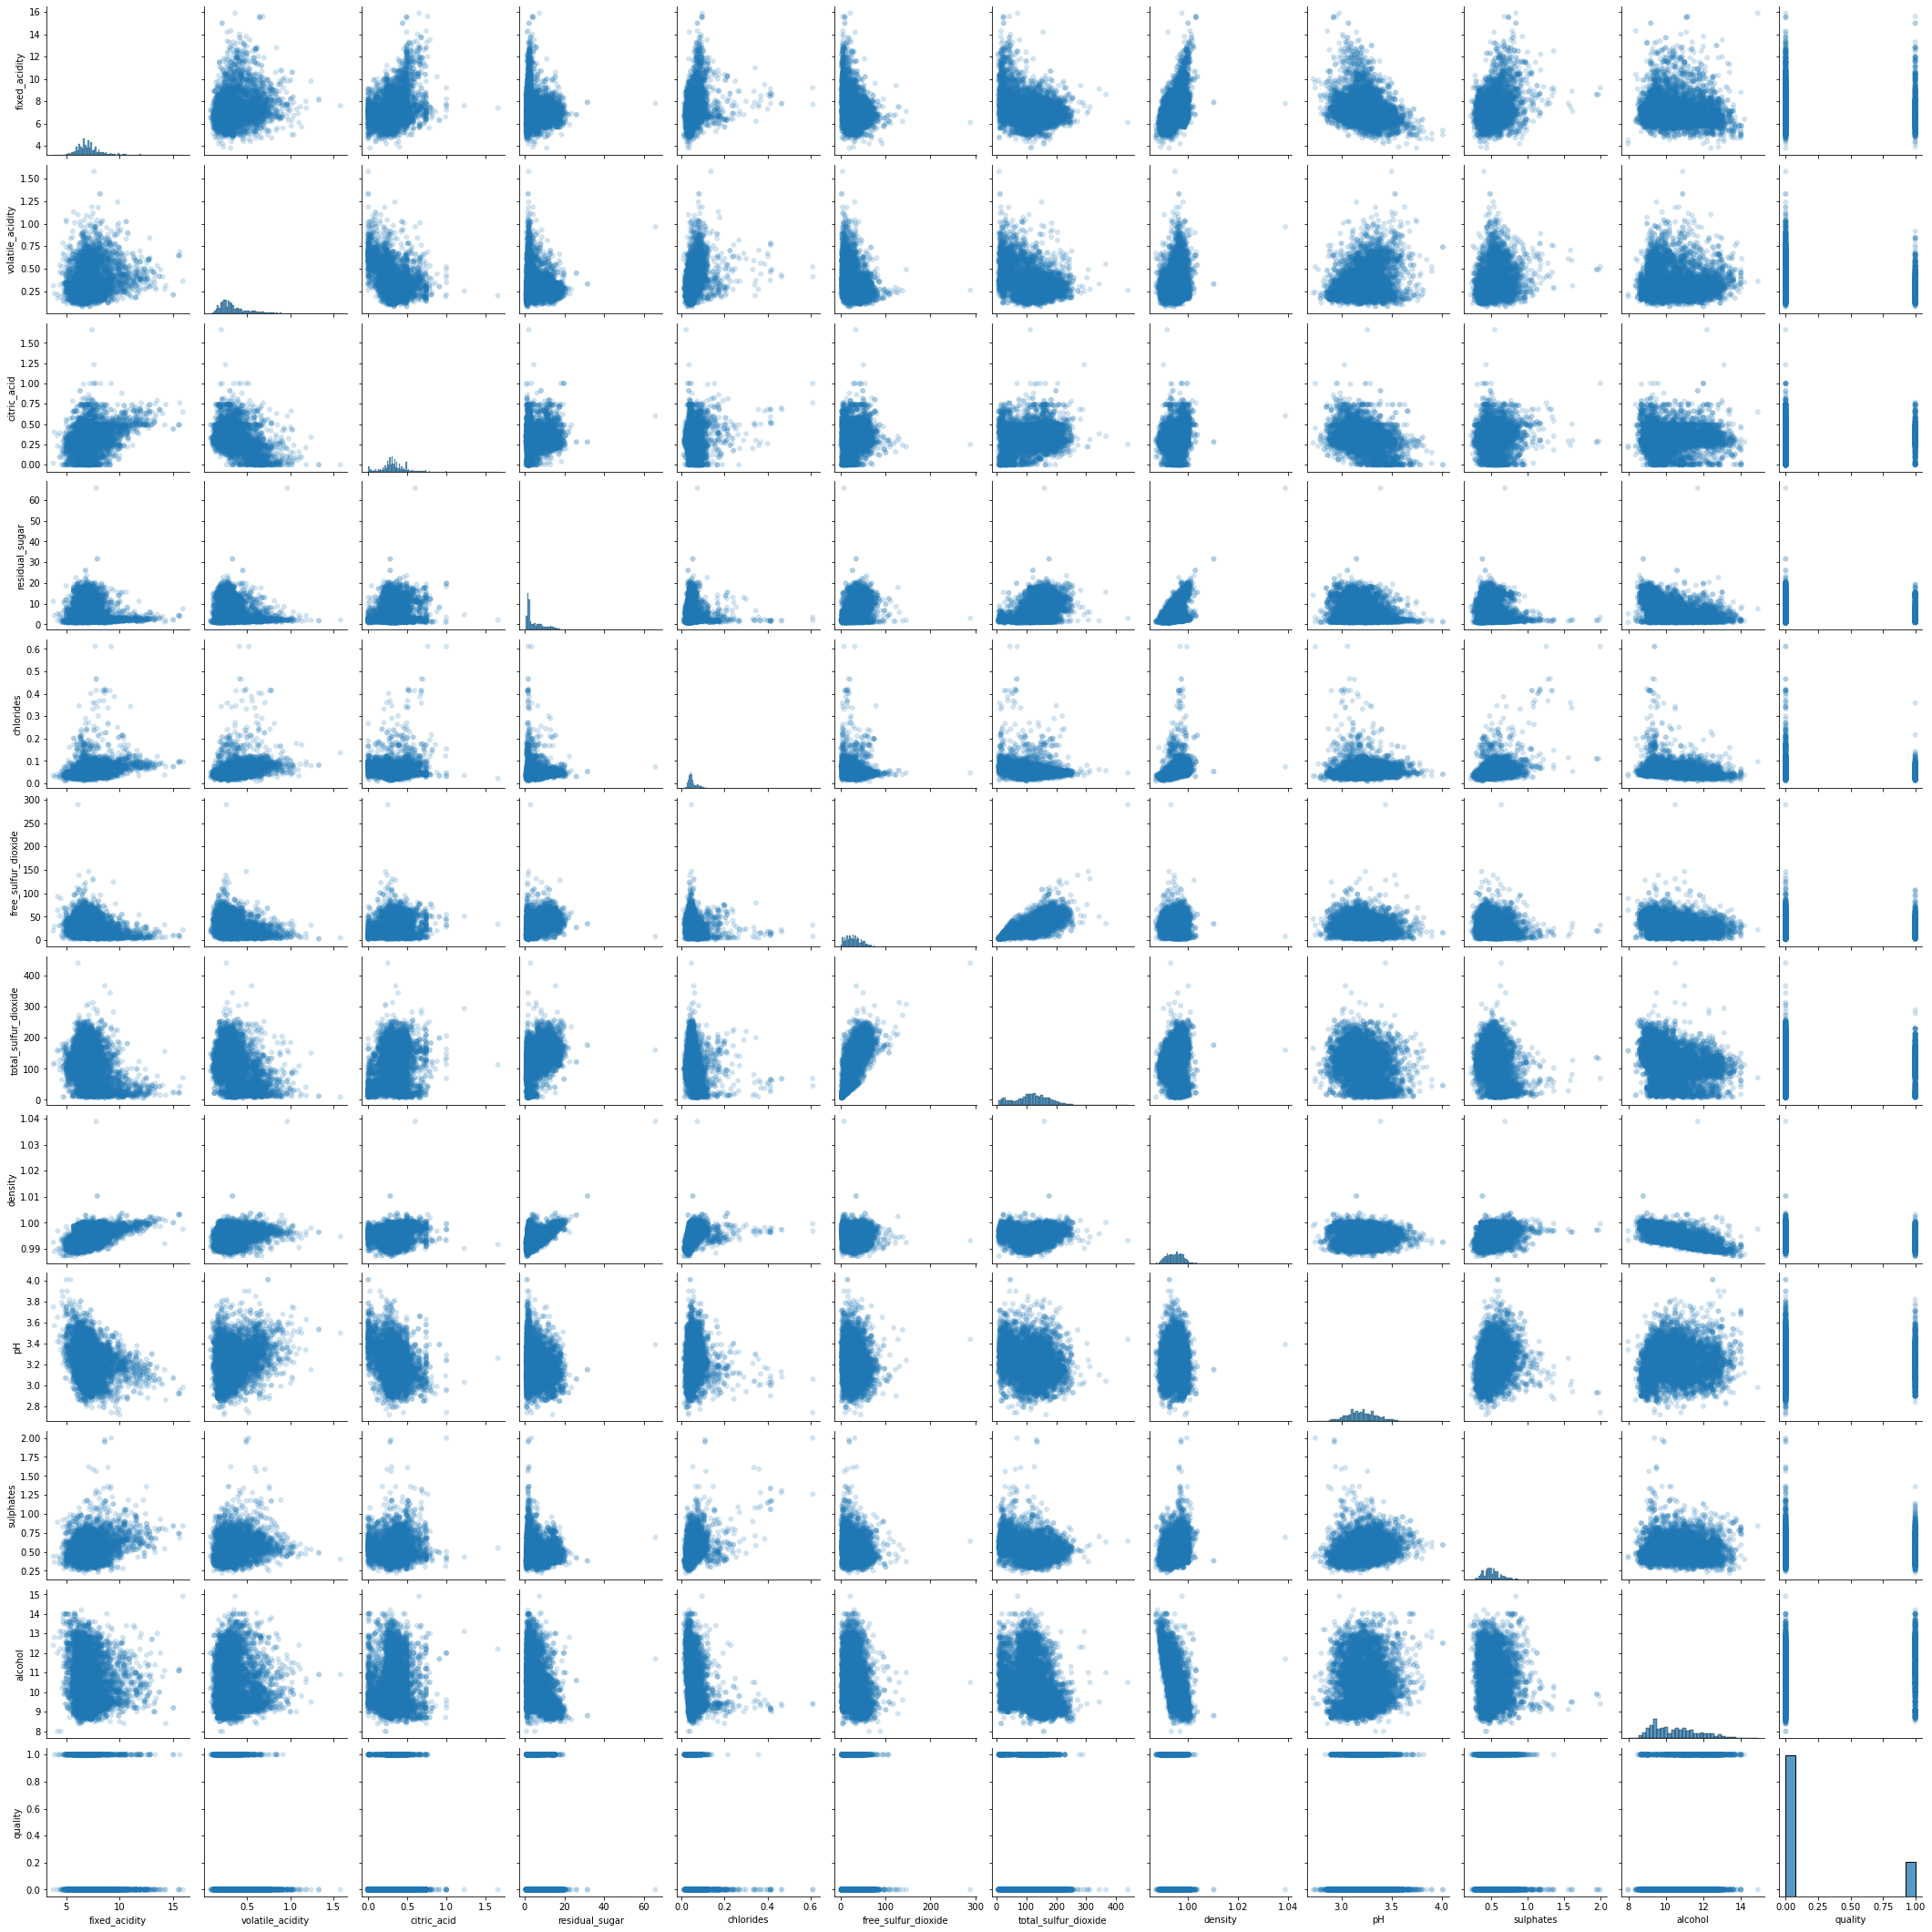

In [18]:

sns.pairplot(data, plot_kws=dict(alpha=.2, edgecolor='none'));

In [19]:
# Lets check multicollinearity between variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

feature_cols = [x for x in data.columns if x not in 'quality']
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)



calc_vif(data[feature_cols])

variables         VIF
0          fixed_acidity   58.897405
1       volatile_acidity    8.943681
2            citric_acid    9.340251
3         residual_sugar    3.576148
4              chlorides    5.575434
5    free_sulfur_dioxide    8.452180
6   total_sulfur_dioxide   14.732237
7                density  936.984064
8                     pH  589.005172
9              sulphates   18.491253
10               alcohol  107.135452

In [20]:
# check for null values, if they exist
data.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [21]:
data['quality'].value_counts()

0    5220
1    1277
Name: quality, dtype: int64

In [22]:
data['quality'].value_counts(normalize=True)

0    0.803448
1    0.196552
Name: quality, dtype: float64

As you can see the data is not evenly split between target values. 80% is bad quality, while 20% is good quality wine.Now split data into train and test sets keeping that percentage.

In [23]:

feature_cols = [x for x in data.columns if x not in 'quality']

strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data['quality']))

# Create the data sets with scaling 
scaler=StandardScaler()

# Create the data sets

X_train_s = scaler.fit_transform(data.loc[train_idx, feature_cols])
y_train = data.loc[train_idx, 'quality']

X_test_s = scaler.transform(data.loc[test_idx, feature_cols])
y_test = data.loc[test_idx, 'quality']


In [24]:
y_train.value_counts(normalize=True)


0    0.803541
1    0.196459
Name: quality, dtype: float64

In [25]:
y_test.value_counts(normalize=True)

0    0.803077
1    0.196923
Name: quality, dtype: float64

In [26]:
y_test.value_counts()

0    1044
1     256
Name: quality, dtype: int64

In [23]:
# data.iloc[:, :-1].min().value_counts()
# data.iloc[:, :-1].max().value_counts()

In [24]:
# From min and max values we see that data is not scaled. Lets scale the values.
# scaler=StandardScaler()
# X_train_scaled=scaler.fit_transform(X_train)
# X_test_scaled=scaler.transform(X_test)

# 3. Modelling Section

## 3.1 Logistic Regression Algorithm

In [25]:
# from sklearn.metrics import precision_recall_fscore_support as score
# precision, recall, fscore, _ = score(y_test, y_pred_lr1, average='weighted')


In [26]:
# from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, 
#                             recall_score, f1_score,roc_auc_score, roc_curve, precision_recall_curve)
# precision_recall_curve(y_test, y_pred_lr0)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay,
                            accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,
                            roc_curve,precision_recall_curve)

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train_s, y_train)
y_pred_lr0 = lr.predict(X_test_s)
clf_report_lr_0 = pd.DataFrame(classification_report(y_test, y_pred_lr0, output_dict=True))

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train_s, y_train)
y_pred_lr1 = lr_l1.predict(X_test_s)
clf_report_lr_1 = pd.DataFrame(classification_report(y_test, y_pred_lr1, output_dict=True))

# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train_s, y_train)
y_pred_lr2 = lr_l2.predict(X_test_s)
clf_report_lr_2 = pd.DataFrame(classification_report(y_test, y_pred_lr2, output_dict=True))




As we can see, Vanilla, Lasso and Ridge regressions showed the same results on both class 0 and class 1. Despite the accuracy is around 82% for 3 of them, but recall and F1-score is much lower on class 1. This is due to the imbalance between those classes (80% of target value are class 1-bad quality and 20% are class 2-good quality). 

In [25]:
clf_report_lr_0

0           1  accuracy    macro avg  weighted avg
precision     0.841176    0.609091  0.821538     0.725134      0.795473
recall        0.958812    0.261719  0.821538     0.610266      0.821538
f1-score      0.896150    0.366120  0.821538     0.631135      0.791775
support    1044.000000  256.000000  0.821538  1300.000000   1300.000000

In [26]:
clf_report_lr_1

0           1  accuracy    macro avg  weighted avg
precision     0.839404    0.673913  0.827692     0.756659      0.806815
recall        0.971264    0.242188  0.827692     0.606726      0.827692
f1-score      0.900533    0.356322  0.827692     0.628427      0.793365
support    1044.000000  256.000000  0.827692  1300.000000   1300.000000

In [27]:
clf_report_lr_2

0           1  accuracy    macro avg  weighted avg
precision     0.837459    0.670455  0.826154     0.753957      0.804572
recall        0.972222    0.230469  0.826154     0.601345      0.826154
f1-score      0.899823    0.343023  0.826154     0.621423      0.790176
support    1044.000000  256.000000  0.826154  1300.000000   1300.000000

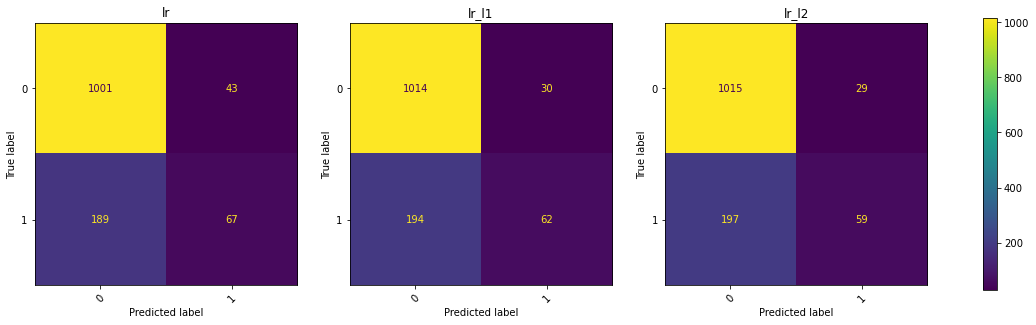

In [28]:
# Lets display confusion matrix for each model
classifiers = {
    "lr": lr,
    "lr_l1": lr_l1,
    "lr_l2": lr_l2

}

f, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X_test_s)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.grid(False)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()

f.colorbar(disp.im_, ax=axes)
plt.show()

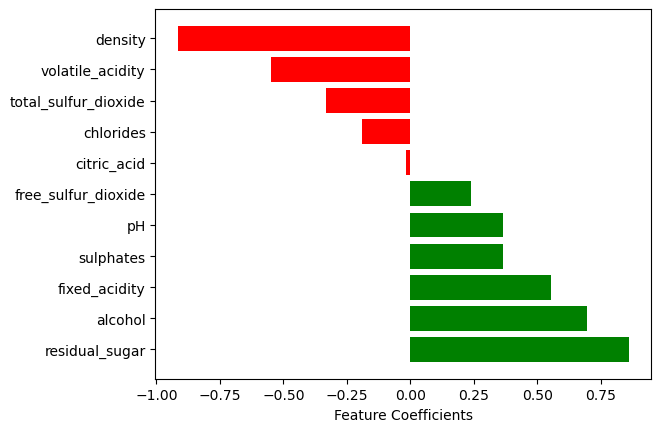

In [29]:
# Now lets interpret logistic regression models. Lets use Vanilla Regression.


# lr.coef_
feature_cols=list(data.iloc[:, :-1].columns)

# Extract and sort feature coefficients

def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

coef_dict = get_feature_coefs(lr, 0, feature_cols)
visualize_coefs(coef_dict)

## 3.2 KNN Algorithm

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

 We need to scale the data before using KNN model. remember that the K-nearest neighbors algorithm uses distance and hence requires scaled data.

In [32]:

grid_params={
    
     'n_neighbors':list(range(1,100)),
     'weights':['uniform','distance'],
     'metric':['euclidean','manhattan']
}

gs=GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose=2,
    cv=4,
    scoring='f1',
    n_jobs=-1
    )
            
gs_results=gs.fit(X_train_s,y_train)



Fitting 4 folds for each of 396 candidates, totalling 1584 fits


In [31]:
import pickle
# pickle.dump(gs_results,open('gs_results','wb'))
gs_results=pickle.load(open('gs_results','rb'))

In [32]:
gs_results.best_score_

0.6427830809556325

In [33]:
gs_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}

In [34]:
pd.DataFrame(gs_results.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.025483      0.001500         0.194382        0.004153   
1         0.024983      0.000707         0.081449        0.002500   
2         0.025482      0.000499         0.233855        0.002343   
3         0.024732      0.001298         0.114680        0.002486   
4         0.026732      0.001478         0.245598        0.002770   
..             ...           ...              ...             ...   
391       0.030227      0.002277         0.409998        0.015114   
392       0.032978      0.005913         0.590384        0.033172   
393       0.062709      0.021671         0.534920        0.091252   
394       0.030229      0.002164         0.638855        0.043301   
395       0.033475      0.007224         0.370021        0.044974   

    param_metric param_n_neighbors param_weights  \
0      euclidean                 1       uniform   
1      euclidean                 1      distance   
2      euclidean                 2       uniform   
3      euclidean                 2      distance   
4      euclidean                 3       uniform   
..           ...               ...           ...   
391    manhattan                97      distance   
392    manhattan                98       uniform   
393    manhattan                98      distance   
394    manhattan                99       uniform   
395    manhattan                99      distance   

                                                params  split0_test_score  \
0    {'metric': 'euclidean', 'n_neighbors': 1, 'wei...           0.588000   
1    {'metric': 'euclidean', 'n_neighbors': 1, 'wei...           0.588000   
2    {'metric': 'euclidean', 'n_neighbors': 2, 'wei...           0.457584   
3    {'metric': 'euclidean', 'n_neighbors': 2, 'wei...           0.588000   
4    {'metric': 'euclidean', 'n_neighbors': 3, 'wei...           0.542017   
..                                                 ...                ...   
391  {'metric': 'manhattan', 'n_neighbors': 97, 'we...           0.544987   
392  {'metric': 'manhattan', 'n_neighbors': 98, 'we...           0.289086   
393  {'metric': 'manhattan', 'n_neighbors': 98, 'we...           0.544987   
394  {'metric': 'manhattan', 'n_neighbors': 99, 'we...           0.293255   
395  {'metric': 'manhattan', 'n_neighbors': 99, 'we...           0.548718   

     split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0             0.568093           0.577438           0.648956         0.595622   
1             0.568093           0.577438           0.648956         0.595622   
2             0.498741           0.512563           0.552381         0.505317   
3             0.568093           0.577438           0.648956         0.595622   
4             0.556237           0.553015           0.580122         0.557848   
..                 ...                ...                ...              ...   
391           0.577320           0.577215           0.585608         0.571282   
392           0.343195           0.352941           0.309942         0.323791   
393           0.580311           0.572890           0.580000         0.569547   
394           0.346041           0.349854           0.319767         0.327229   
395           0.580311           0.571429           0.576441         0.569225   

     std_test_score  rank_test_score  
0          0.031588              134  
1          0.031588              134  
2          0.033872              213  
3          0.031588              134  
4          0.013899              202  
..              ...              ...  
391        0.015559              194  
392        0.025605              393  
393        0.014487              199  
394        0.022780              390  
395        0.012251              200  

[396 rows x 15 columns]

In [35]:
knn = KNeighborsClassifier(n_neighbors=8, weights='distance',metric='euclidean')
knn = knn.fit(X_train_s, y_train)
y_pred = knn.predict(X_test_s)

KNN_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
KNN_report

0           1  accuracy    macro avg  weighted avg
precision     0.909091    0.711712  0.875385     0.810401      0.870222
recall        0.938697    0.617188  0.875385     0.777942      0.875385
f1-score      0.923657    0.661088  0.875385     0.792372      0.871951
support    1044.000000  256.000000  0.875385  1300.000000   1300.000000

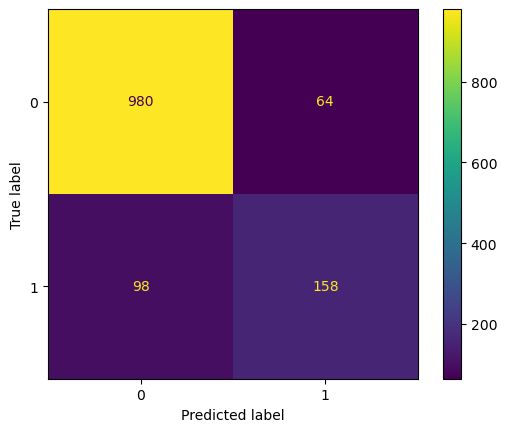

In [36]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [41]:
# Now lets determine the right K value for KNN model. 

#max_k = 120
#f1_scores = list()
#error_rates = list() # 1-accuracy

#for k in range(1, max_k):
    
#    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
#    knn = knn.fit(X_train_s, y_train)
    
#    y_pred = knn.predict(X_test_s)
#    f1 = f1_score(y_test, y_pred)
#    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
#    error = 1-round(accuracy_score(y_test, y_pred), 4)
#    error_rates.append((k, error))
    
#f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
#error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

In [42]:
#max_K=f1_results['F1 Score'].idxmax()
#f1_results.loc[max_K]

In [43]:
#min_error_id = error_results['Error Rate'].idxmin()
#error_results.loc[min_error_id]

In [44]:
# Plot F1 results
#sns.set_context('talk')
#sns.set_style('ticks')

#plt.figure(dpi=300)
#ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
#ax.set(xlabel='K', ylabel='F1 Score')
#ax.set_xticks(range(1, max_k, 2));
#plt.title('KNN F1 Score')
#plt.savefig('knn_f1.png')

In [45]:
# Plot Accuracy (Error Rate) results
#sns.set_context('talk')
#sns.set_style('ticks')

#plt.figure(dpi=300)
#ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
#ax.set(xlabel='K', ylabel='Error Rate')
#ax.set_xticks(range(1, max_k, 2))
#plt.title('KNN Elbow Curve')
#plt.savefig('knn_elbow.png')
### END SOLUTION

## 3.3 SVM Algorithm

Train SVM with different regularization parameters and kernels. The SVC model provided by sklearn has two important arguments to be tuned: regularization parameter C and kernel.

The `C` argument is a regularization (penalty) parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimisation how much error is bearable.. This is how you can control the trade-off between decision boundary and misclassification term.

*   For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. When C is high it will classify all the data points correctly, also there is a chance to overfit
*   Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.


The `Gamma` defines how far influences the calculation of plausible line of separation. When gamma is higher, nearby points will have high influence; low gamma means far away points also be considered to get the decision boundary.

The `kernel` argument specifies the kernel to be used for transforming features to higher-dimensional spaces, some commonly used non-linear kernels are:

*   `rbf`: Gaussian Radial Basis Function (RBF)
*   `poly`: Polynomial Kernel
*   `sigmoid`: Sigmoid Kernel

    

In [40]:


from sklearn.svm import SVC

params_grid = {
    'C': [0.001,0.1,1,10,100,1000],
    'gamma':[0.001,0.01,0.1,1,10],
    #'gamma':[0.001,0.01,0.1,1,10,100],
    #'kernel': ['poly', 'rbf', 'sigmoid'],
    'kernel': ['rbf', 'sigmoid']
}

# Define a GridSearchCV to search the best parameters
SVM_GS = GridSearchCV(estimator =SVC(), 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 4, verbose = 2,n_jobs=-1)

# Search the best parameters with training data
SVM_GS_results=SVM_GS.fit(X_train_s, y_train.values.ravel())

Fitting 4 folds for each of 60 candidates, totalling 240 fits


In [35]:
#pickle.dump(SVM_GS_results,open('SVM_GS_results','wb'))
SVM_GS_results=pickle.load(open('SVM_GS_results','rb'))

In [36]:
SVM_GS_results.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [37]:
SVM_GS_results.best_score_

0.5978331117849476

In [41]:
SVM = SVC(C=10,gamma=1,kernel='rbf')
SVM_results = SVM.fit(X_train_s, y_train)
SVM_y_pred = SVM.predict(X_test_s)

SVM_report = pd.DataFrame(classification_report(y_test, SVM_y_pred, output_dict=True))
SVM_report

0           1  accuracy    macro avg  weighted avg
precision     0.901550    0.729064  0.874615     0.815307      0.867583
recall        0.947318    0.578125  0.874615     0.762722      0.874615
f1-score      0.923867    0.644880  0.874615     0.784374      0.868928
support    1044.000000  256.000000  0.874615  1300.000000   1300.000000

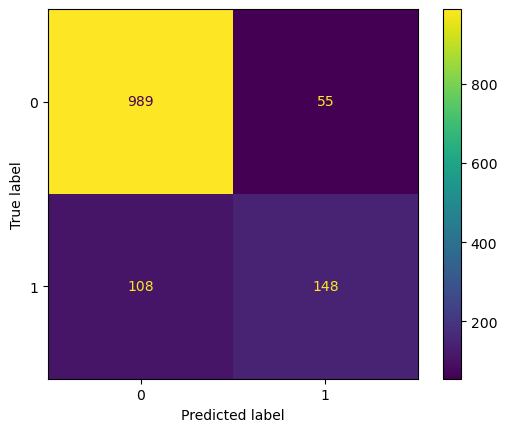

In [42]:
SVM_cm = confusion_matrix(y_test, SVM_y_pred, labels=SVM_results.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=SVM_cm, display_labels=SVM_results.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [51]:
# import pickle
# pickle.dump(GV_GBC,open('gv_gbc','wb'))

# GV_GBC=pickle.load(open('gv_gbc','rb'))

## 3.4 DT Algorithm

The `DecisionTreeClassifier` has many arguments (model hyperparameters) that can be customized and eventually tune the generated decision tree classifiers. Among these arguments, there are three commonly tuned arguments as follows:

*   criterion: `gini` or `entropy`, which specifies which criteria to be used when splitting a tree node
*   max_depth: a numeric value to specify the max depth of the tree. Larger tree depth normally means larger model complexity
*   min_samples_leaf: The minimal number of samples in leaf nodes. Larger samples in leaf nodes will tend to generate simpler trees


In [46]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=42)
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20,25,30,35,40,45,50],
    'min_samples_leaf': [1, 2, 5,10]
}

DT_GS = GridSearchCV(DT,
                  param_grid=params_grid,
                  scoring='f1',
                  cv=4,
                  verbose=2,
                  n_jobs=-1)

DT_GS_results = DT_GS.fit(X_train_s, y_train.values.ravel())



Fitting 4 folds for each of 80 candidates, totalling 320 fits


In [43]:
#pickle.dump(DT_GS_results,open('DT_GS_results','wb'))
DT_GS_results=pickle.load(open('DT_GS_results','rb'))

In [44]:
DT_GS_results.best_params_

{'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 1}

In [45]:
DT_GS_results.best_score_

0.5953087470478641

In [47]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy',max_depth=25,min_samples_leaf=1,random_state=42)
DT_results = DT.fit(X_train_s, y_train)
DT_y_pred = DT.predict(X_test_s)

DT_report = pd.DataFrame(classification_report(y_test, DT_y_pred, output_dict=True))
DT_report

0           1  accuracy    macro avg  weighted avg
precision     0.902037    0.576208  0.834615     0.739123      0.837874
recall        0.890805    0.605469  0.834615     0.748137      0.834615
f1-score      0.896386    0.590476  0.834615     0.743431      0.836145
support    1044.000000  256.000000  0.834615  1300.000000   1300.000000

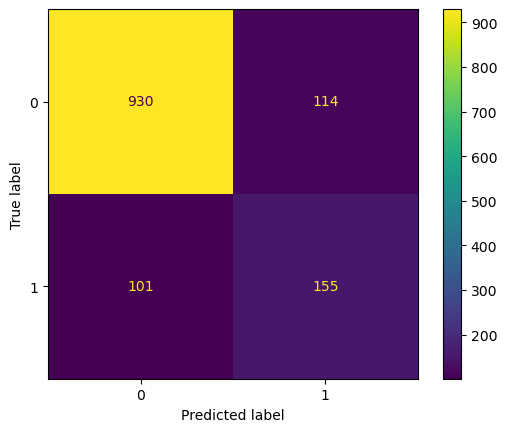

In [48]:
DT_cm = confusion_matrix(y_test, DT_y_pred, labels=DT_results.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=DT_cm, display_labels=DT_results.classes_)
disp.plot()
plt.grid(False)
plt.show()

## 3.5 BAGGING Algorithms

### 3.5.1 Bagging with SVM

In [52]:
# Bagging with base estimator as SVM
from sklearn.ensemble import BaggingClassifier

SVM = SVC(C=10,gamma=1,kernel='rbf')
Bag=BaggingClassifier(base_estimator=SVM, n_estimators=10, random_state=42)


param_grid = {'n_estimators': [1,3,5,10,20,30,40,50,60,70,80,100]}

Bagging_SVM_GS = GridSearchCV(estimator=Bag, param_grid=param_grid, scoring='f1', cv=4, verbose=2, n_jobs=-1)

Bag_SVM_results=Bagging_SVM_GS.fit(X_train_s,y_train)


Fitting 4 folds for each of 12 candidates, totalling 48 fits


In [49]:
#pickle.dump(Bag_SVM_results,open('Bag_SVM_results','wb'))
Bag_SVM_results=pickle.load(open('Bag_SVM_results','rb'))

In [51]:
Bag_SVM_results.best_params_

{'n_estimators': 100}

In [52]:
Bag_SVM_results.best_score_

0.6001938376028939

In [54]:
from sklearn.ensemble import BaggingClassifier
SVM = SVC(C=10,gamma=1,kernel='rbf')
Bag_SVM=BaggingClassifier(base_estimator=SVM, n_estimators=100, random_state=42)
Bag_SVM_results = Bag_SVM.fit(X_train_s, y_train)
Bag_SVM_y_pred = Bag_SVM.predict(X_test_s)

Bag_SVM_report = pd.DataFrame(classification_report(y_test, Bag_SVM_y_pred, output_dict=True))
Bag_SVM_report

0           1  accuracy    macro avg  weighted avg
precision     0.895255    0.759563  0.876154     0.827409      0.868534
recall        0.957854    0.542969  0.876154     0.750412      0.876154
f1-score      0.925497    0.633257  0.876154     0.779377      0.867949
support    1044.000000  256.000000  0.876154  1300.000000   1300.000000

### 3.5.2 Bagging with DT

In [57]:
# Bagging with base estimator as DT
DT = DecisionTreeClassifier(criterion='entropy',max_depth=25,min_samples_leaf=1,random_state=42)
Bag_DT=BaggingClassifier(base_estimator=DT, n_estimators=10, random_state=42)

param_grid = {'n_estimators': [1,3,5,10,20,30,40,50,60,70,80,100]}
Bagging_DT_GS = GridSearchCV(estimator=Bag_DT, param_grid=param_grid, scoring='f1', cv=4, verbose=2, n_jobs=-1)
Bag_DT_results=Bagging_DT_GS.fit(X_train_s,y_train)


Fitting 4 folds for each of 12 candidates, totalling 48 fits


In [55]:
# pickle.dump(Bag_DT_results,open('Bag_DT_results','wb'))
Bag_DT_results=pickle.load(open('Bag_DT_results','rb'))

In [56]:
Bag_DT_results.best_params_

{'n_estimators': 100}

In [57]:
Bag_DT_results.best_score_

0.6372027363059285

In [58]:
DT = DecisionTreeClassifier(criterion='entropy',max_depth=25,min_samples_leaf=1,random_state=42)
Bag_DT=BaggingClassifier(base_estimator=DT, n_estimators=100, random_state=42)
Bag_DT_results = Bag_DT.fit(X_train_s, y_train)
Bag_DT_y_pred = Bag_DT.predict(X_test_s)

Bag_DT_report = pd.DataFrame(classification_report(y_test, Bag_DT_y_pred, output_dict=True))
Bag_DT_report

0           1  accuracy    macro avg  weighted avg
precision     0.902816    0.748744  0.879231     0.825780      0.872475
recall        0.952107    0.582031  0.879231     0.767069      0.879231
f1-score      0.926807    0.654945  0.879231     0.790876      0.873271
support    1044.000000  256.000000  0.879231  1300.000000   1300.000000

### 3.5.3 Random Forest Algorithm

Random forests are a combination of trees such that each tree depends on a random subset of the features and data. As a result, each tree in the forest is different and usually performs better than Bagging. The most important parameters are the number of trees and the number of features to sample. 


In [86]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(oob_score=True,warm_start=True)
                    

param_grid = {'n_estimators': [15,20,50,100,200,300,400],
              #'n_estimators': [5,10,15,20,25,30,40,50,60,80,100,120,140,150,170,180,200],
              'max_depth' : [10,20,40,60,80,100],
              #'max_depth' : [20,25,30,35,40,45,50 ]
             #'max_features':["auto", "sqrt", "log2"]
             }

RF_GS=GridSearchCV(estimator=RF, param_grid=param_grid,scoring='f1', cv=4, verbose=2, n_jobs=-1)
RF_GS_results=RF_GS.fit(X_train_s,y_train)



Fitting 4 folds for each of 42 candidates, totalling 168 fits


In [87]:
RF_GS_results.best_params_

{'max_depth': 100, 'n_estimators': 300}

In [88]:
RF_GS_results.best_score_

0.6406129573816775

In [89]:
RF = RandomForestClassifier(oob_score=True,warm_start=True,n_estimators=300,max_depth=100)

RF_results = RF.fit(X_train_s, y_train)
RF_y_pred = RF_results.predict(X_test_s)

RF_report = pd.DataFrame(classification_report(y_test, RF_y_pred, output_dict=True))
RF_report

0           1  accuracy    macro avg  weighted avg
precision     0.899287    0.803371  0.886154     0.851329      0.880399
recall        0.966475    0.558594  0.886154     0.762534      0.886154
f1-score      0.931671    0.658986  0.886154     0.795329      0.877973
support    1044.000000  256.000000  0.886154  1300.000000   1300.000000

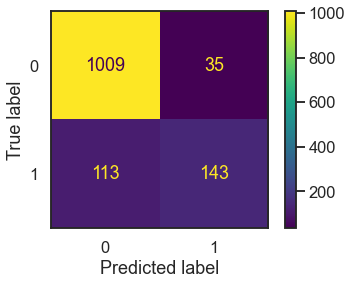

In [91]:
RF_cm = confusion_matrix(y_test, RF_y_pred, labels=RF_results.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=RF_cm, display_labels=RF_results.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [77]:
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)
oob_list = list()

for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train_s, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

C:\Users\n.pashayev\Anaconda3_64bit\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\n.pashayev\Anaconda3_64bit\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\n.pashayev\Anaconda3_64bit\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\n.pashayev\Anaconda3_64bit\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


oob
n_trees          
15.0     0.134116
20.0     0.127381
30.0     0.124302
40.0     0.118145
50.0     0.119300
100.0    0.113142
150.0    0.112565
200.0    0.110833
300.0    0.110063
400.0    0.110448

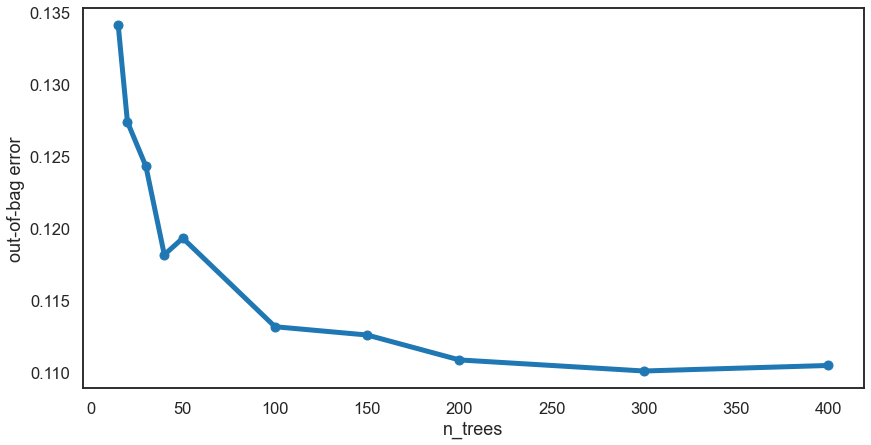

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

## 3.6 BOOSTING Algorithms

### 3.6.1 Gradient Boosting

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'n_estimators': [15,20,50,100,200,300,400],
             'learning_rate': [0.1, 0.01, 0.001, 0.0001],
             'subsample': [1.0, 0.5],
             'max_features': [1, 2, 3, 4,6,8,10,11]}
GBC=GradientBoostingClassifier(random_state=42)
GBC_GS = GridSearchCV(estimator=GBC, 
                      param_grid=param_grid, 
                      scoring='f1',
                      cv=4, verbose=2, n_jobs=-1)
GBC_GS_results=GBC_GS.fit(X_train_s,y_train)


Fitting 4 folds for each of 448 candidates, totalling 1792 fits


In [96]:
#pickle.dump(GBC_GS_results,open('GBC_GS_results','wb'))
#GBC_GS_results=pickle.load(open('GBC_GS_results','rb'))

In [93]:
GBC_GS_results.best_params_

{'learning_rate': 0.1,
 'max_features': 6,
 'n_estimators': 400,
 'subsample': 1.0}

In [94]:
GBC_GS_results.best_score_

0.5726869577748603

In [98]:
GBC_GS_results.best_estimator_

GradientBoostingClassifier(max_features=6, n_estimators=400, random_state=42)

In [95]:
GBC=GradientBoostingClassifier(learning_rate=0.1,max_features=6,n_estimators=400,subsample=1.0, random_state=42)

GBC_results = GBC.fit(X_train_s, y_train)
GBC_y_pred = GBC_results.predict(X_test_s)

GBC_report = pd.DataFrame(classification_report(y_test, GBC_y_pred, output_dict=True))
GBC_report

0           1  accuracy    macro avg  weighted avg
precision     0.888589    0.705882  0.862308     0.797236      0.852610
recall        0.947318    0.515625  0.862308     0.731472      0.862308
f1-score      0.917014    0.595937  0.862308     0.756476      0.853787
support    1044.000000  256.000000  0.862308  1300.000000   1300.000000

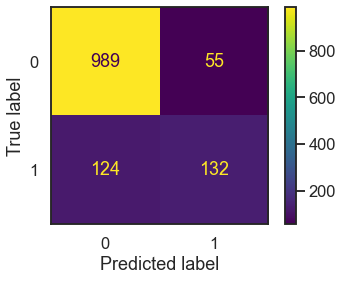

In [97]:
GBC_cm = confusion_matrix(y_test, GBC_y_pred, labels=GBC_results.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=GBC_cm, display_labels=GBC_results.classes_)
disp.plot()
plt.grid(False)
plt.show()

### 3.6.2 AdaBoost Classifier

In [99]:
from sklearn.ensemble import AdaBoostClassifier

ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

param_grid = {'base_estimator__max_depth':[5, 10, 15, 20,25,30,35,40,45,50],
              'n_estimators': [15,20,50,100,200,300,400],
              'learning_rate': [0.1, 0.01, 0.001, 0.00011]}

ABC_GS = GridSearchCV(estimator=ABC, 
                      param_grid=param_grid, 
                      scoring='f1',
                      cv=4, verbose=2, n_jobs=-1)
ABC_GS_results=ABC_GS.fit(X_train_s,y_train)


Fitting 4 folds for each of 280 candidates, totalling 1120 fits


In [104]:
#pickle.dump(ABC_GS_results,open('ABC_GS_results','wb'))
#ABC_GS_results=pickle.load(open('ABC_GS_results','rb'))

In [100]:
ABC_GS_results.best_params_

{'base_estimator__max_depth': 10, 'learning_rate': 0.1, 'n_estimators': 400}

In [101]:
ABC_GS_results.best_score_

0.6393175114265812

In [102]:
ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),learning_rate=0.1,n_estimators=400)

ABC_results = ABC.fit(X_train_s, y_train)
ABC_y_pred = ABC_results.predict(X_test_s)

ABC_report = pd.DataFrame(classification_report(y_test, ABC_y_pred, output_dict=True))
GBC_report

0           1  accuracy    macro avg  weighted avg
precision     0.905576    0.803191  0.890769     0.854384      0.885414
recall        0.964559    0.589844  0.890769     0.777202      0.890769
f1-score      0.934137    0.680180  0.890769     0.807159      0.884127
support    1044.000000  256.000000  0.890769  1300.000000   1300.000000

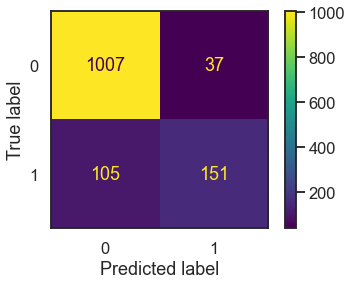

In [103]:
ABC_cm = confusion_matrix(y_test, ABC_y_pred, labels=ABC_results.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=ABC_cm, display_labels=ABC_results.classes_)
disp.plot()
plt.grid(False)
plt.show()

### 3.6.3 XGBoost Classifier

In [39]:
import xgboost as xgb
params = { 'max_depth': [20,60,100],
           'learning_rate': [0.001, 0.01, 0.1],
           'n_estimators': [20,100,300,400],
           'scale_pos_weight':[3,4,6],
           #'gamma': [0, 0.5, 1, 10],
           'subsample': [0.1, 0.4, 0.8],
           'colsample_bytree': [0.3, 0.5,0.9]}

XGB=xgb.XGBClassifier(booster='gbtree',objective="binary:logistic", random_state=42)

XGBOOST_GS = GridSearchCV(estimator=XGB, 
                      param_grid=params, 
                      scoring='f1',
                      cv=4, verbose=2, n_jobs=-1)

XGBOOST_GS_results=XGBOOST_GS.fit(X_train_s,y_train)

Fitting 4 folds for each of 972 candidates, totalling 3888 fits


In [42]:
#pickle.dump(XGBOOST_GS_results,open('XGBOOST_GS_results','wb'))
#XGBOOST_GS_results=pickle.load(open('XGBOOST_GS_results','rb'))

In [40]:
XGBOOST_GS_results.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.01,
 'max_depth': 20,
 'n_estimators': 300,
 'scale_pos_weight': 4,
 'subsample': 0.8}

In [41]:
XGBOOST_GS_results.best_score_

0.6731489335499505

In [ ]:
#params = { 'max_depth': [3,6,10,20,40,60,10],
#           'learning_rate': [0.001,0.01, 0.05, 0.1],
#           'n_estimators': [15,20,50,100,200,300,400],
#          'gamma': [0, 0.25, 1, 10],
#           'subsample': [0.1,0.2, 0.3, 0.4, 0.5, 0.8,1],
#           'colsample_bytree': [0.3, 0.5, 0.7,0.9,1]}

In [43]:
XGB=xgb.XGBClassifier(booster='gbtree',objective="binary:logistic", 
                      colsample_bytree=0.9,
                      learning_rate=0.01,
                      max_depth=20,
                      n_estimators=300,
                      scale_pos_weight=4,
                      subsample=0.8,
                      random_state=42)

XGB_results = XGB.fit(X_train_s, y_train)
XGB_y_pred = XGB_results.predict(X_test_s)

XGB_report = pd.DataFrame(classification_report(y_test, XGB_y_pred, output_dict=True))
XGB_report

0           1  accuracy    macro avg  weighted avg
precision     0.916117    0.698745  0.876154     0.807431      0.873311
recall        0.931034    0.652344  0.876154     0.791689      0.876154
f1-score      0.923515    0.674747  0.876154     0.799131      0.874527
support    1044.000000  256.000000  0.876154  1300.000000   1300.000000

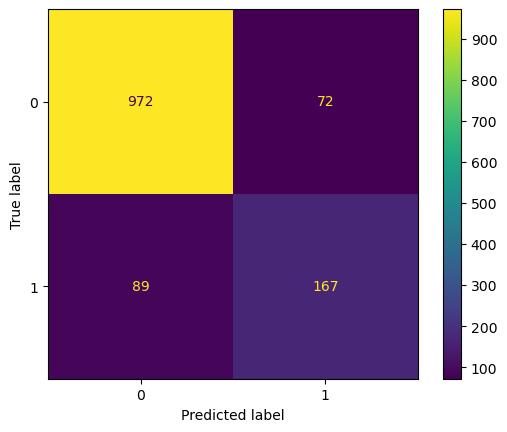

In [44]:
XGB_cm = confusion_matrix(y_test, XGB_y_pred, labels=XGB_results.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=XGB_cm, display_labels=XGB_results.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [114]:
## 3.7 STACKING Algorithms